In [44]:
% matplotlib inline
import pandas_datareader.data as web
import datetime
import pylab as pl


In [39]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)
panel = web.DataReader(['aapl', 'goog', 'amzn'], start=start, end=end, data_source='yahoo')
df = panel['Close']
df = df.sort_index().reset_index().rename(
    columns={'Date': 'date'}
).reset_index().rename(
    columns={'index': 'day'}
)

In [40]:
df.head()

,day,date,aapl,amzn,goog
0,0,2016-01-04,105.349998,636.989990,741.840027
1,1,2016-01-05,102.709999,633.789978,742.580017
2,2,2016-01-06,100.699997,632.650024,743.619995
3,3,2016-01-07,96.449997,607.940002,726.390015
4,4,2016-01-08,96.959999,607.049988,714.469971


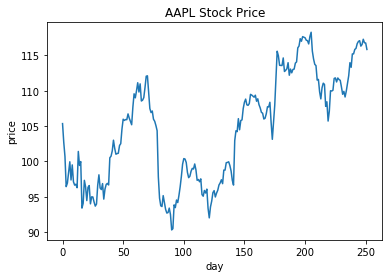

In [53]:
# simple line plot with axis labels and title
pl.plot(df.day, df.aapl)
pl.xlabel('day')
pl.ylabel('price')
pl.title('AAPL Stock Price')

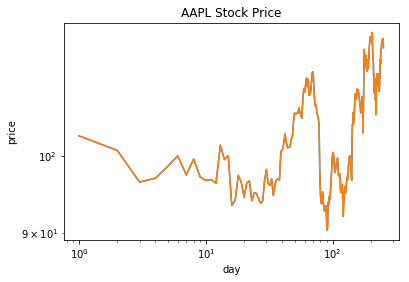

In [104]:
# simple plot with log axes
pl.loglog(df.day, df.aapl)
pl.xlabel('day')
pl.ylabel('price')
pl.title('AAPL Stock Price')

# another plot with only one axis being log
# simple plot with log axes
pl.semilogx(df.day, df.aapl)
pl.xlabel('day')
pl.ylabel('price')
pl.title('AAPL Stock Price')


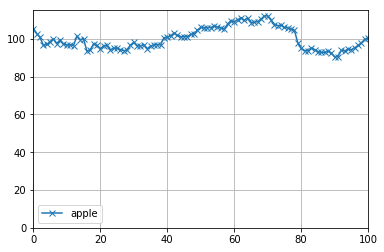

In [101]:
# line plot with markers, custom axes, and grid, and custom legend placement
pl.plot(df.day, df.aapl, 'x-', label='apple')
ax = pl.gca()
ax.set_xlim((0, 100))
ax.set_ylim((0, 115))
pl.grid(True)
pl.legend(loc=3)


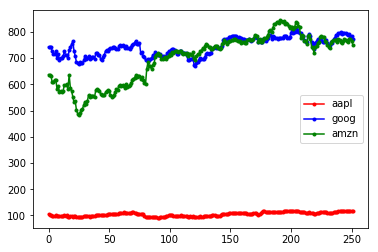

In [98]:
# plots on same axis with best placement of legend
pl.plot(df.day, df.aapl, 'r.-')
pl.plot(df.day, df.goog, 'b.-')
pl.plot(df.day, df.amzn, 'g.-')
pl.legend(loc='best')



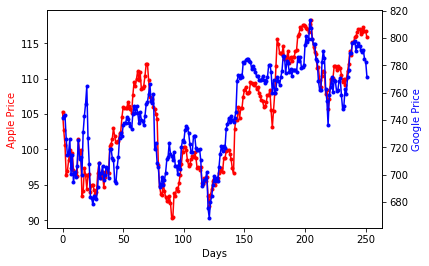

In [58]:
# twinx plot (really want this for bokeh backend)
pl.plot(df.day, df.aapl, 'r.-')
pl.xlabel('Days')
pl.ylabel('Apple Price', color='red')
ax = pl.gca()
ax.twinx()

pl.plot(df.day, df.goog, 'b.-')
pl.ylabel('Google Price', color='blue')

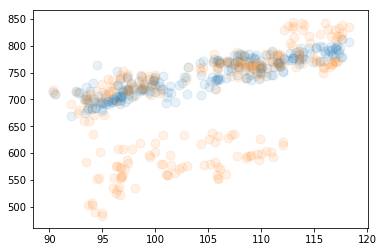

In [71]:
# transparent scatter plot
pl.scatter(df.aapl, df.goog, alpha=.1, s=80)
pl.scatter(df.aapl, df.amzn, alpha=.1, s=80)



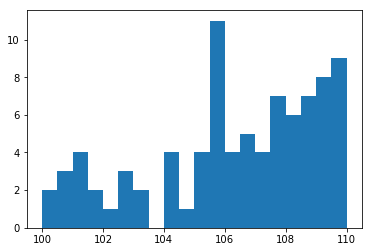

In [83]:
# simple histogram setting bins and range
_ = pl.hist(df.aapl, bins=20, range=(100, 110))

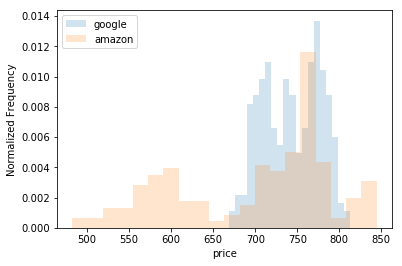

In [84]:
# transparent  histogram with legend and labels
_ = pl.hist(df.goog, bins=20, normed=True, alpha=.2, label='google')
_ = pl.hist(df.amzn, bins=20, normed=True, alpha=.2, label='amazon')
pl.legend(loc='best')
pl.xlabel('price')
pl.ylabel('Normalized Frequency')

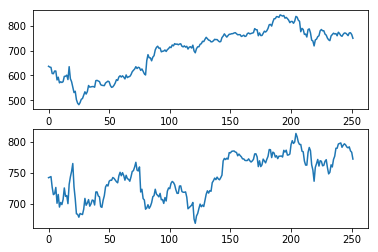

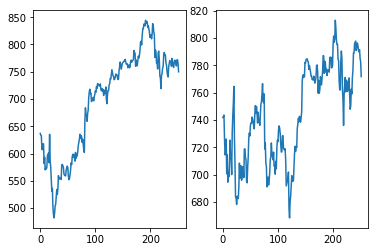

In [108]:
# two figures with different subplot layouts
pl.subplot(211)
pl.plot(df.day, df.amzn)
pl.subplot(212)
pl.plot(df.day, df.goog)

pl.figure()
pl.subplot(121)
pl.plot(df.day, df.amzn)
pl.subplot(122)
pl.plot(df.day, df.goog)


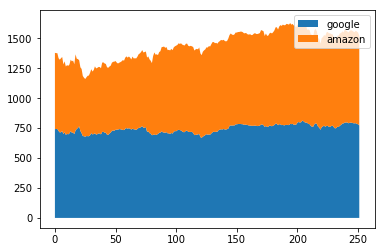

In [110]:
# simple stacked filled chart
pl.fill_between(df.day, df.goog, label='google')
pl.fill_between(df.day, df.amzn + df.goog, df.goog, label='amazon')
pl.legend(loc='best')



In [113]:
!pwd

/Users/rob
